In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%load_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder that should be the extracted zip folder 
dataset = pd.read_csv(file)  # load the data and drop the first row that was filled with nans
features = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst','Sudden Weight Loss',
                       'Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability',
                       'Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Diagnosis','Family History']

random.seed(42) #our random seed
dataset.head(10) #visualise file

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


In [2]:
dataset = dataset.interpolate()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

In [3]:
def make_data_binary(data):
    binary = data.copy()
    ''' 
    We have changed the values from string to the binary ones, it will be easier for us 
    to work with the data.
    Female = 1, Male = 0.
    Yes = 1, No = 0
    Positive = 1, Negative = 0
    '''
    binary = binary.replace('Female',1).replace('Male',0).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
    return binary.replace(np.nan, np.random.choice([0,1])) #we see in the data we have nan values. We have dropped them.

data = make_data_binary(dataset)
diag_state = data[["Diagnosis"]]
data.head(10) #visualize data after binarization


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,0,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,0,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,1,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0
5,72,0,1,0.0,0.0,0,1.0,0.0,1,1.0,0,1,1,1.0,1,0,0,0
6,43,0,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,0,0.0,1,0,0,1
7,57,0,1,1.0,1.0,1,1.0,0.0,1,0.0,0,0,1,0.0,0,0,1,0
8,37,0,0,0.0,0.0,1,0.0,0.0,0,0.0,0,1,0,0.0,1,0,1,1
9,56,0,1,0.0,1.0,1,0.0,1.0,0,1.0,1,0,0,0.0,1,0,1,1


In [4]:
data.describe()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,48.169912,0.362832,0.483186,0.463717,0.419469,0.571681,0.458407,0.240708,0.449558,0.493805,0.235398,0.461947,0.426549,0.384071,0.357522,0.168142,0.607080,0.506195
std,12.295828,0.481243,0.500160,0.499124,0.493909,0.495274,0.498709,0.427892,0.497890,0.500405,0.424623,0.498992,0.495014,0.486806,0.479695,0.374323,0.488832,0.500405
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


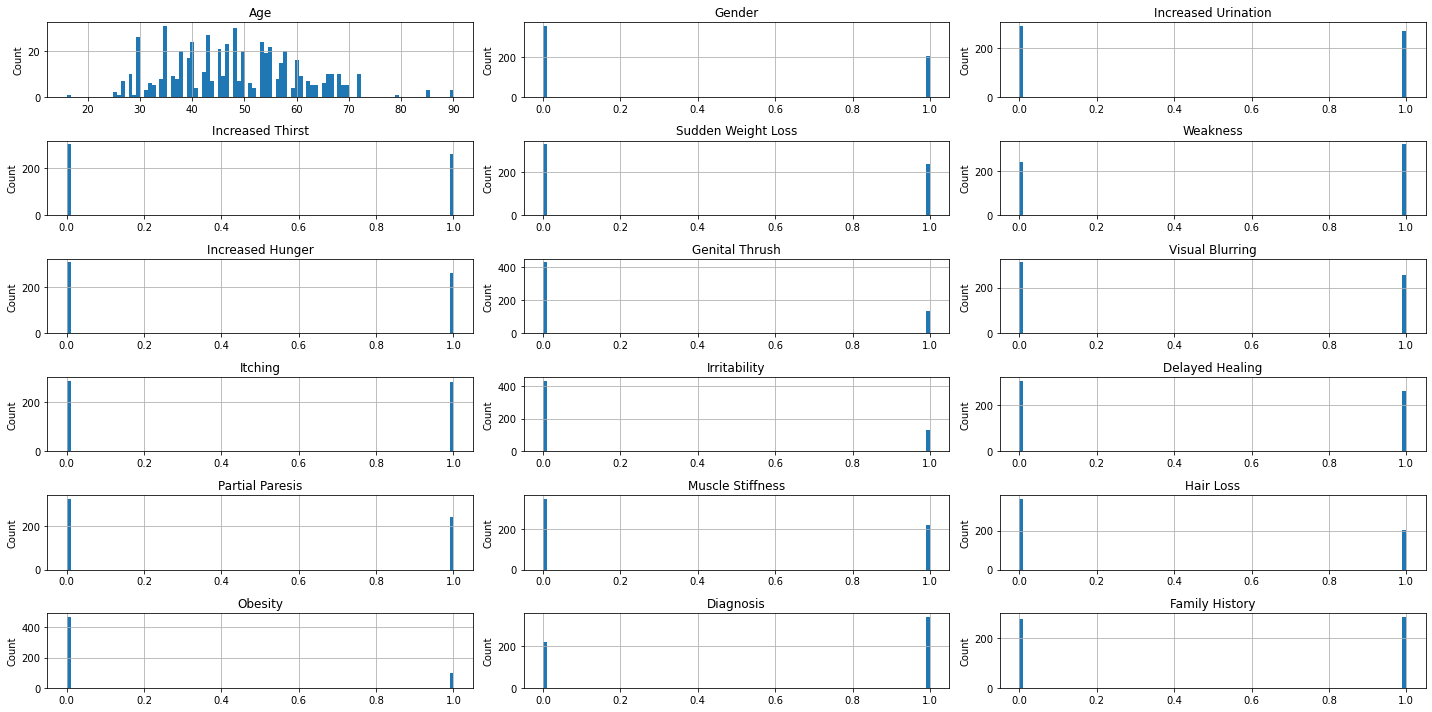

In [5]:
axarr = data.hist(bins=100,layout = (6, 3),figsize=(20, 10))
for i,ax in enumerate(axarr.flatten()):
#     ax.set_xlabel(xlbl[i])
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

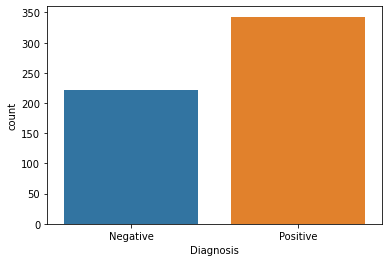

Negative samples account for 39.29% of the data.
Positive samples account for 60.71% of the data.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.countplot(x = 'Diagnosis', data = diag_state)
g.set(xticklabels=['Negative','Positive'])
plt.show()
idx_1 = (diag_state == 1).index[(diag_state == 1)['Diagnosis'] == True].tolist() # positive
idx_2 = (diag_state == 0).index[(diag_state == 0)['Diagnosis'] == True].tolist() # negative
print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(diag_state))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(diag_state))) + "% of the data.")

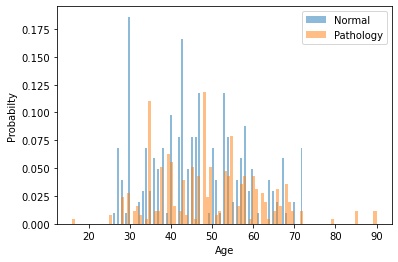

In [7]:
bins = 100
feat = 'Age'
plt.hist(data[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Normal')
plt.hist(data[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Pathology')
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

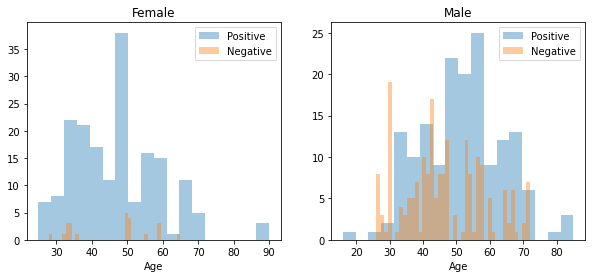

In [8]:
Positive = 'Positive'
Negative = 'Negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']==1]
men = data[data['Gender']==0]
ax = sns.distplot(women[women['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

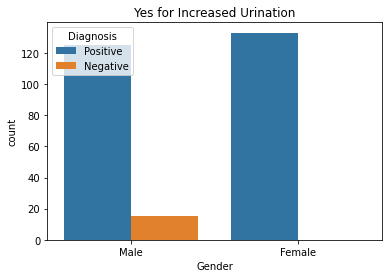

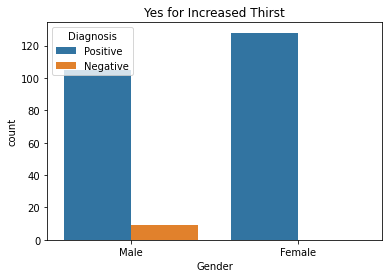

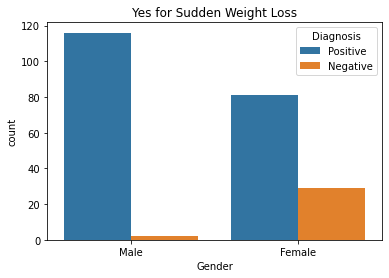

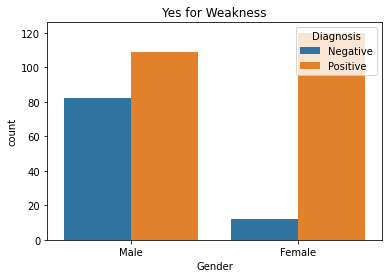

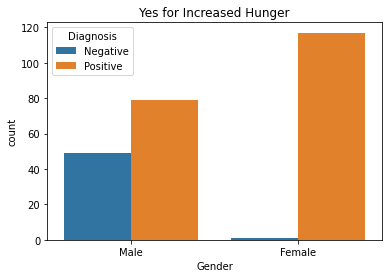

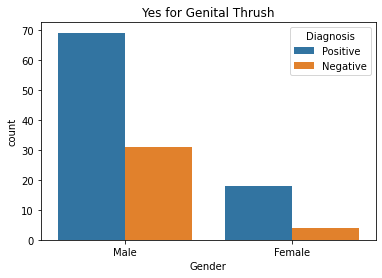

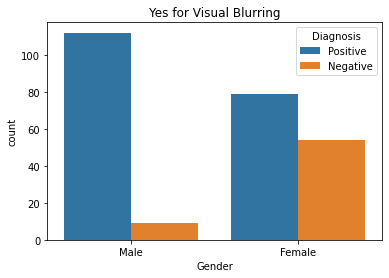

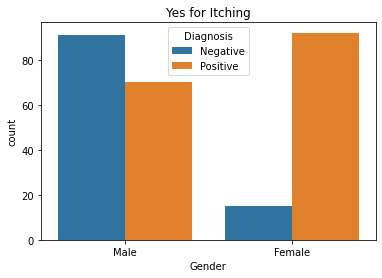

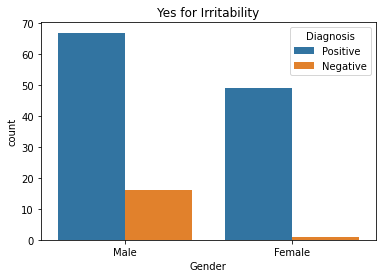

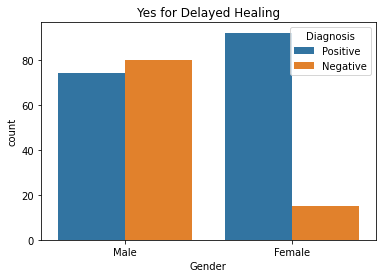

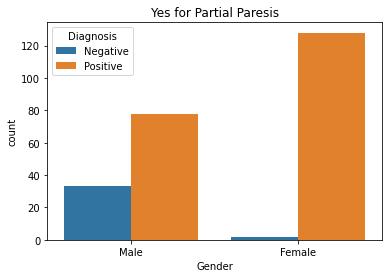

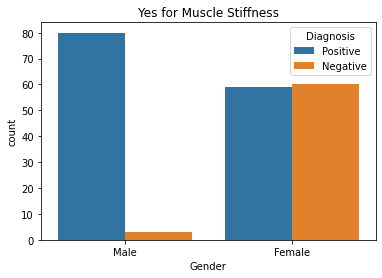

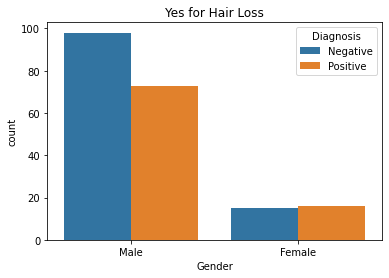

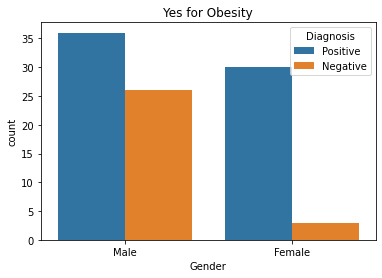

In [9]:
for i in dataset.keys():
    if i == 'Age' or i == 'Gender' or i =='Diagnosis' or i == 'Family History': 
        continue
    g = sns.countplot(x = 'Gender', hue= 'Diagnosis', data = dataset[dataset[i] == 'Yes'])
    g.set(xticklabels=['Male','Female'])
    plt.title('Yes for {}'. format(i))
    plt.show()


C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


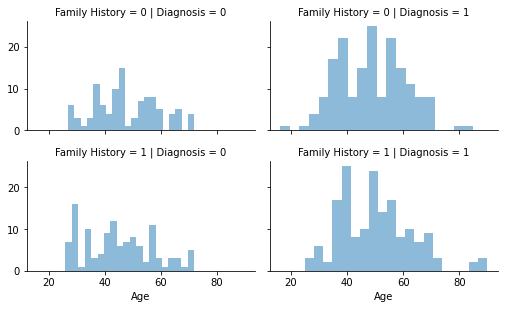

In [10]:
grid = sns.FacetGrid(data, col='Diagnosis', row='Family History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [11]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


orig_feat = data.columns.values
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(diag_state), test_size=0.2, random_state=10, stratify=np.ravel(diag_state))
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty='l2', max_iter=10000)
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
w_log = logreg.coef_

print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_log))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_log, average='macro'))) + "%")                                                    

Accuracy is: 100.00%
F1 score is: 100.00%


In [12]:
def find_distribution(X,features):
    count = 0
    feat = features.copy()
    feat.pop(0) #drop age
    feat.pop(15) #drop diagnosis
    percent = np.zeros(len(feat))
    for i in range(len(feat)):
        for j in X['Diagnosis'].index.values:
            if X[feat[i]][j] == 1:
                count += 1
                percent[i] = count/len(X[feat[i]])
        count = 0
    return percent*100,feat

In [13]:
percent_train,feat = find_distribution(X_train,features)
percent_test,_ = find_distribution(X_test,features)
delta = -(percent_test-percent_train)
a = np.array([percent_train,percent_test,delta]).T

distribution = pd.DataFrame(a,columns = ['Train%','Test%','Delta%'], index = feat )

In [14]:
distribution.head(16)

,Train%,Test%,Delta%
Gender,37.389381,31.858407,5.530973
Increased Urination,48.451327,47.787611,0.663717
Increased Thirst,46.017699,47.787611,-1.769912
Sudden Weight Loss,41.371681,44.247788,-2.876106
Weakness,55.752212,62.831858,-7.079646
Increased Hunger,45.796460,46.017699,-0.221239
Genital Thrush,22.787611,29.203540,-6.415929
Visual Blurring,44.247788,47.787611,-3.539823
Itching,48.893805,51.327434,-2.433628
Irritability,22.566372,27.433628,-4.867257


In [15]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object 
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))



In [16]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder( sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [17]:
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(dataset) # It returns an numpy array

In [18]:
X_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
# turn X into dict
X_dict = dataset.to_dict(orient='records') # turn each row as key-value pairs

In [20]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

In [21]:
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
# show X_encoded
X_encoded

array([[45.,  0.,  0., ...,  0.,  0.,  1.],
       [42.,  0.,  0., ...,  0.,  0.,  0.],
       [45.,  1.,  1., ...,  0.,  0.,  1.],
       ...,
       [61.,  0.,  1., ...,  0.,  0.,  0.],
       [46.,  1.,  0., ...,  0.,  0.,  1.],
       [37.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
# vocabulary
vocab = dv_X.vocabulary_
# show vocab
vocab

{'Age': 0,
 'Gender': 4,
 'Increased Urination': 9,
 'Increased Thirst': 8,
 'Sudden Weight Loss': 15,
 'Weakness': 17,
 'Increased Hunger': 7,
 'Genital Thrush': 5,
 'Visual Blurring': 16,
 'Itching': 11,
 'Irritability': 10,
 'Delayed Healing': 1,
 'Partial Paresis': 14,
 'Muscle Stiffness': 12,
 'Hair Loss': 6,
 'Obesity': 13,
 'Diagnosis': 2,
 'Family History': 3}

In [23]:
# Get dummies
X = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)
# X head
X.head()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,45,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,40,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0


In [24]:
data.head()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,0,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,0,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,1,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0


In [25]:
def cv_kfold(X, y, C, penalty, K):
    """
    
    :param X: Training set samples
    :param y: Training set labels 
    :param C: A list of regularization parameters
    :param penalty: A list of types of norm
    :param K: Number of folds
    :param mode: Mode of normalization (parameter of norm_standard function in clean_data module)
    :return: A dictionary as explained in the notebook
    """
    kf = SKFold(n_splits=K)
    validation_dict = []

    f = {}
    for c in C:
        for p in penalty:
            logreg = LogisticRegression(solver='saga', penalty=p, C=c, max_iter=10000, multi_class='ovr')
            loss_val_vec = np.zeros(K)
            k = 0
            for train_idx, val_idx in kf.split(X, y):
                x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]
               
                logreg.fit(x_train,y_train)
                v = logreg.predict_proba(x_val)
                loss_val_vec[k] = log_loss(y_val, v)
                k += 1
            mu = loss_val_vec.mean()

            std = loss_val_vec.std()

            validation_dict.append({'mu': mu, 'sigma': std, 'C': c, 'penalty': p})

    return validation_dict


In [26]:
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.metrics import log_loss
C = [0.001, 0.01, 0.1, 1, 10, 100]
val_dict = cv_kfold(X_train,y_train,C=C,penalty=['l1','l2'],K=5)

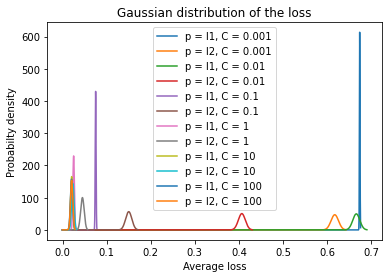

In [27]:
import scipy.stats as stats
for d in val_dict:
    x = np.linspace(0, d['mu'] + 3 * d['sigma'], 1000)
    plt.plot(x,stats.norm.pdf(x, d['mu'], d['sigma']), label="p = " + d['penalty'] + ", C = " + str(d['C'])) 
    plt.title('Gaussian distribution of the loss')
    plt.xlabel('Average loss')
    plt.ylabel('Probabilty density')
plt.legend()
plt.show()

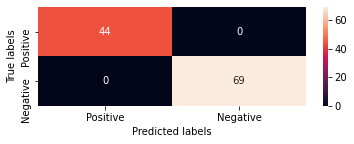

Accuracy is: 100.00%
F1 score is: 100.00%


In [28]:
C =  0.1 # complete this part according to your best result
penalty =  'l1'# complete this part according to your best result
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train,y_train)
y_pred =  logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

In [29]:
from sklearn.metrics import confusion_matrix
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

In [30]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score

TN = calc_TN(y_test, y_pred)
FP = calc_FP(y_test, y_pred)
FN = calc_FN(y_test, y_pred)
TP = calc_TP(y_test, y_pred)
sensitivity = (TP/(TP+FN)) #Recall
specificity = (TN/(TN + FP))
accuracy = (TN + TP)/(TN + TP + FN + FP)
PPV = (sensitivity*accuracy)/(sensitivity*accuracy + (1-specificity)*(1-accuracy))
NPV = (specificity*(1-accuracy))/((1-sensitivity)*accuracy + specificity*(1-accuracy))
Precision = TP / (TP + FP)
F1 = (2*sensitivity*Precision)/(Precision + sensitivity)
print('Sensitivity is {:.2f}'.format(sensitivity))
print('Specificity is {:.2f}'.format(specificity))
print('PPV is {:.2f}'.format(PPV))
print('NPV is {:.2f}'.format(NPV))
print('Accuracy is {:.2f}'.format(accuracy))
print('F1 is {:.2f}'.format(F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

Sensitivity is 1.00
Specificity is 1.00
PPV is 1.00
NPV is nan
Accuracy is 1.00
F1 is 1.00
AUROC is 1.00


C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [31]:
def plot_radar(clf,params,clf_type):
    labels=np.array(['Accuracy', 'F1', 'PPV', 'Sensitivity', 'AUROC']) 
    score_mat_train = np.stack((clf.cv_results_['mean_train_accuracy'], clf.cv_results_['mean_train_f1'],
                               clf.cv_results_['mean_train_precision'], clf.cv_results_['mean_train_recall'],
                               clf.cv_results_['mean_train_roc_auc']), axis=0)
    score_mat_val = np.stack((clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'],
                               clf.cv_results_['mean_test_precision'], clf.cv_results_['mean_test_recall'],
                               clf.cv_results_['mean_test_roc_auc']), axis=0)


    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot

    angles=np.concatenate((angles,[angles[0]]))
    cv_dict = clf.cv_results_['params']
    fig=plt.figure(figsize=(18,14))
    for idx, loc in enumerate(cv_dict):
        ax = fig.add_subplot(1, len(lmbda), 1+idx, polar=True)
        stats_train = score_mat_train[:, idx]
        stats_train=np.concatenate((stats_train,[stats_train[0]]))
        ax.plot(angles, stats_train, 'o-', linewidth=2)
        ax.fill(angles, stats_train, alpha=0.25)
        stats_val = score_mat_val[:, idx]
        stats_val=np.concatenate((stats_val,[stats_val[0]]))
        ax.plot(angles, stats_val, 'o-', linewidth=2)
        ax.fill(angles, stats_val, alpha=0.25)
        ax.set_thetagrids(angles[0:-1] * 180/np.pi, labels)
        if idx == 0:
            ax.set_ylabel('$L_2$', fontsize=18)
        if cv_dict[idx]['logistic__C'] <= 1:
            ax.set_title('$\lambda$ = %d'  % (1 / cv_dict[idx]['logistic__C']))
        else:
            ax.set_title('$\lambda$ = %.3f' % (1 / cv_dict[idx]['logistic__C']))
        ax.set_ylim([0,1])
        ax.legend(['Train','Validation'])
        ax.grid(True)
    plt.tight_layout()
    plt.show()



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
solver = 'liblinear'
max_iter = 1000
log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver=solver)
lmbda = np.array([0.01, 0.1, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.000, test=1.000), precision=(train=1.000, test=1.000), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.000, test=1.000), precision=(train=1.000, test=1.000), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.000, test=1.000), precision=(train=1.000, test=1.000), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] logistic__C=100.0, logi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  logistic__C=10.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.000, test=1.000), precision=(train=1.000, test=1.000), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.000, test=1.000), precision=(train=1.000, test=1.000), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.000, test=1.000), precision=(train=1.000, test=1.000), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=1.000, test=1.000), f1=(train=1.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


{'logistic__C': 100.0, 'logistic__penalty': 'l2'}

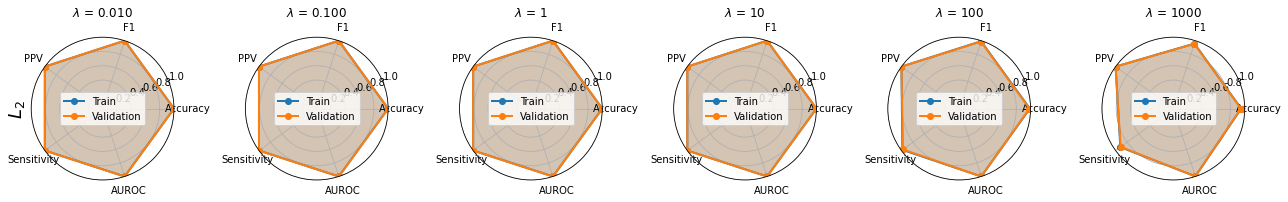

Sensitivity is 1.00. 
Specificity is 1.00. 
PPV is 1.00. 
NPV is 1.00. 
Accuracy is 1.00. 
F1 is 1.00. 
AUROC is 1.00


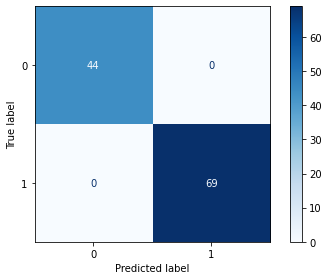

In [33]:
params = ['C', 'penalty']
clf_type = 'log_reg'
plot_radar(clf,params,clf_type)
chosen_clf = clf.best_estimator_
y_pred_test = chosen_clf.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = chosen_clf.predict_proba(X_test)

plot_confusion_matrix(chosen_clf,X_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.tight_layout()

TN = calc_TN(y_test, y_pred)
FP = calc_FP(y_test, y_pred)
FN = calc_FN(y_test, y_pred)
TP = calc_TP(y_test, y_pred)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))

print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

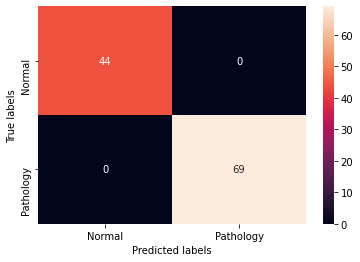

Accuracy is: 100.00%
F1 score is: 100.00%


In [34]:
from sklearn import svm
clf = svm.NuSVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Normal', 'Pathology'],
            yticklabels=['Normal', 'Pathology'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

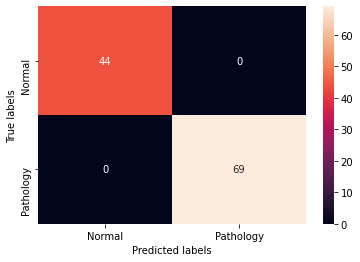

Accuracy is: 100.00%
F1 score is: 100.00%


In [35]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Normal', 'Pathology'],
            yticklabels=['Normal', 'Pathology'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

Theory Questions 

Q1: If we have unbalanced data we can get high accuracy but the other performances will be bad. For example if we have 3% pathology data samples and the classifier always returns healthy label we will get high accuracy (97%) but sensitivity, for example, will be low. 

Q2: If we chose just 2 features we have 2 options:
1) we choose the most correlated features and other not usefull for our classification we will get good performance for predicted labels, and it will be easy for computation

2) if we chose features with bad correlation (it means not usefull for classification) we will get a bad prediction results. But computation will be fast.

If we chose all the features, we have extra information that is not useful for us and make computetions slower, require a large amount of system memory and will affect the performance. 

Q3: we will prfer SVM non-linear, because if we can not distinguish the difference between pancreas biopsies from the human eye the data is not separable linearly. So we do not want to use Logistiq regression and SVM with linear kernel, due to their similarity.

Q4: SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting. SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.